# Week 2

## 0. Requirements

### 0.1 Library Import

In [11]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Matplotlib stylesheet
plt.style.use('classic')
sns.set(font_scale=2.5)

In [13]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [14]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [15]:
#rich output available
%matplotlib inline

In [16]:
#for machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [17]:
from pandas import Series

### 0.2 Data Import

In [18]:
#import titanic dataset to df_train,df_test
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [19]:
#combine sibsp & parch to familysize
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 

## 1. Feature Engineering

###1.1 Age & Initial

### 1.1.1 Filling Null data

In [20]:
#regular expression application
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.')

In [21]:
#check relations of initial and sex
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [22]:
#exchange initials to Miss/Mr/Mrs/Other
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [23]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,43.937188,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,24.939822,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778,1.222222


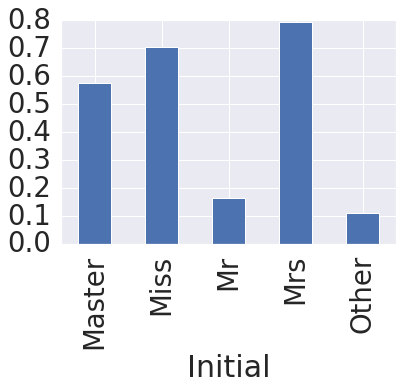

In [24]:
#visualize survial rate of each initial
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [25]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,43.937188,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,24.939822,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778,1.222222


In [26]:
#fill null data by average age of each initial
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

### 1.1.2 Categorize data

In [27]:
#function of categorizing age by 10 years
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    

In [28]:
df_train['Age'] = df_train['Age'].apply(category_age)
df_test['Age']=df_test['Age'].apply(category_age)

1.1.3 Change Initial to Numerical data

In [29]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

### 1.1.4 One-hot encoding

In [30]:
#use pandas get_dummies
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

## 1.2 Embarked

### 1.2.1 Filling Null data

In [31]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


In [32]:
#fill null data by S which is most appeared
df_train['Embarked'].fillna('S', inplace=True)

### 1.2.2 Change to Numerical Data

In [33]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
#map categorical data to numerical data
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

### 1.2.3 One-hot encoding

In [35]:
#use pandas get_dummies
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

## 1.3 Sex

In [36]:
#map categorical data to numerical data
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

## Fare

In [37]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

## 1.4 Drop Columns

In [38]:
#drop unnecessary columns
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [39]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,2,1.981001,2,0,0,1,0,0,0,0,1
1,1,1,0,3,4.266662,2,0,0,0,1,0,1,0,0
2,1,3,0,2,2.070022,1,0,1,0,0,0,0,0,1
3,1,1,0,3,3.972177,2,0,0,0,1,0,0,0,1
4,0,3,1,3,2.085672,1,0,0,1,0,0,0,0,1


In [40]:
df_test.head()

,Pclass,Sex,Age,Fare,FamilySize,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,3,2.057860,1,0,0,1,0,0,0,1,0
1,3,0,4,1.945910,2,0,0,0,1,0,0,0,1
2,2,1,6,2.270836,1,0,0,1,0,0,0,1,0
3,3,1,2,2.159003,1,0,0,1,0,0,0,0,1
4,3,0,2,2.508582,3,0,0,0,1,0,0,0,1


# Building Machine Learning Model

## 2.1 Test Preparation

In [41]:
#separate target label
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [42]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

## 2.2 Model generation & prediction

In [43]:
#make random forest model
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [44]:
print('{}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

268명 중 83.21% 정확도로 생존을 맞춤


## 2.3 Checking feature importance

In [45]:
#get feature importance of model
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

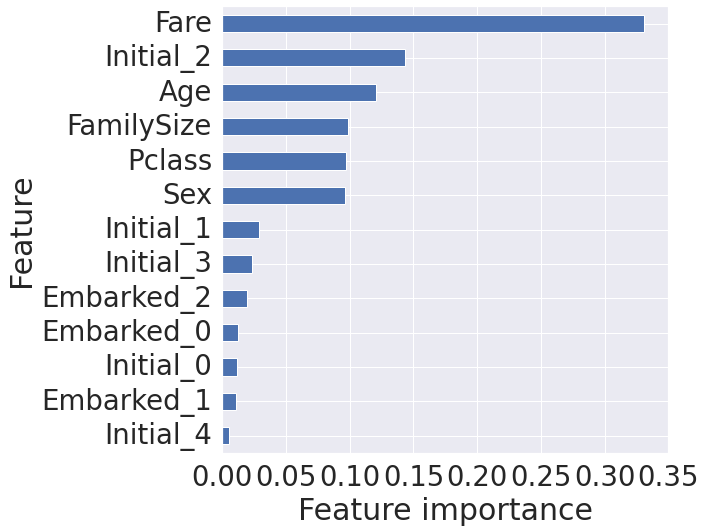

In [46]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

# 3. Predict test dataset

In [47]:
#read kaggle testset data
submission = pd.read_csv('gender_submission.csv')

In [48]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [49]:
#make prediction by model
prediction2 = model.predict(X_test)
submission['Survived'] = prediction2

In [50]:
submission.to_csv('my_submission.csv', index=False)